In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import statistics
import math
from shutil import copyfile


In [2]:
position = ["position_x","position_y","position_z"]
target= ["target_position_x","target_position_y","target_position_z"]
total_time = "time"

max_distance_error = 4.0

max_height_error = 3*max_distance_error/4
max_contraction_error = 1.0
feedback_types = ['Visual', 'Glove', 'Bracelets']
task_types = ["time", "1st_waypoint_time", "2nd_waypoint_time", "3rd_waypoint_time", "extension_time", "contraction_time"]
error_types = ["height_error", "x_error", "z_error", "extension_error"]
#position_x,position_y,position_z,target_position_x,target_position_y,target_position_z,time,extension,target_extension,height_error,distance_to_waypoint,extension_error,reaching_height_time

In [3]:
os.getcwd()
os.chdir('..\Bidirectional_interface\Assets\Logs')



# Arrangement of the log files in folder

In [49]:
folders = ['Raw', 'Visual', 'Glove', 'Bracelets']
for folder in folders:
    try:
        os.mkdir(folder + "\\sorted")
        os.mkdir(folder)
    except:
        print("Folder", folder, "already existing")

Folder Raw already existing
Folder Visual already existing
Folder Glove already existing
Folder Bracelets already existing


In [57]:
def move_in_correct_folder(filename):
    if "drone" in filename :
        newfilename = "Raw" +"\\" + filename
        os.replace(filename, newfilename)    
    else:
        types_of_feedback = ["Visual", "Glove", "Bracelets"]
        for fb_type in types_of_feedback:
            if fb_type in filename :
                newfilename = fb_type +"\\" + filename
                os.replace(filename, newfilename)
                

def organise_logs():
    all_files =  glob.glob("*.csv")
    for file in all_files:  
        move_in_correct_folder(file)

        
def correct_file_length():
    for fb_type in feedback_types:
        all_files =  glob.glob(fb_type +"\\*.csv")
        for file in all_files:    
            df = pd.read_csv(file)
            for i in range(1,10):
                if math.isnan(df["target_extension"][df.index[-i]]): 
                    last_element = i
                    df = df.iloc[0:-last_element] 
            df.to_csv(file, index=False)
        
def correct_contraction_time():
    for fb_type in feedback_types:
        all_files =  glob.glob(fb_type +"\\*.csv")
        for file in all_files:
            df = pd.read_csv(file)
            total_time = df["time"].iloc[-1]
            initial_time = df["time"] [next((i for i, x in enumerate(df["3rd_waypoint_time"]) if x), None)]
            df['contraction_time'].iloc[-1] = total_time - initial_time
            df.to_csv(file, index=False)

def sort_files():
    for fb_type in feedback_types:
        all_files =  glob.glob(fb_type +"\\*.csv")
        for file in all_files:
            splitting = file.split('sub')
            print(fb_type+ "\\sorted\\"+ splitting[1])
            copyfile(file, fb_type+ "\\"+splitting[1])


Put the files in the correct folders

In [6]:
correct_file_length()

In [7]:
file = "Visual//4_27_10_sub4_Visual.csv"
df = pd.read_csv(file)
# total_time = df["time"].iloc[-1]
last_element = next((i for i, x in enumerate(df["target_extension"]) if x), None)
print(last_element)
# df.to_csv(file, index=False)


0


In [8]:
file = "Visual//8_33_04_sub11_Visual.csv"
df = pd.read_csv(file)
for i in range(1,10):
    if math.isnan(df["target_extension"][df.index[-i]]): 
        last_element = i
        df = df.iloc[0:-last_element] 
df.to_csv(file, index=False)


In [9]:
df

position_x  position_y  position_z  target_position_x  \
0      -2.598000    0.455162    5.488032                0.0   
1      -2.598000    0.461320    5.487711               -2.0   
2      -2.598000    0.467080    5.487419               -2.0   
3      -2.598000    0.472299    5.487153               -2.0   
4      -2.598099    0.476978    5.487077               -2.0   
...          ...         ...         ...                ...   
3365    4.003391    2.949467    4.001014                4.0   
3366    4.003891    2.949484    4.004085                4.0   
3367    4.004272    2.949496    4.007025                4.0   
3368    4.004530    2.949504    4.009765                4.0   
3369    4.004661    2.949510    4.012237                4.0   

      target_position_y  target_position_z      time  extension  \
0                 0.000                0.0    0.0000   0.000000   
1                 1.949               -4.0    0.0500   1.266049   
2                 1.949               -4.0    0.1000   1.266049   
3                 1.949               -4.0    0.1500   1.266048   
4                 1.949               -4.0    0.2000   1.265643   
...                 ...                ...       ...        ...   
3365              1.949                4.0  168.2557   0.926534   
3366              1.949                4.0  168.3057   0.928021   
3367              1.949                4.0  168.3557   0.929097   
3368              1.949                4.0  168.4057   0.929741   
3369              1.949                4.0  168.4557   0.929944   

      target_extension  1st_waypoint_time  extension_time  2nd_waypoint_time  \
0                  1.5            0.00000         0.00000            0.00000   
1                  1.5            0.00000         0.00000            0.00000   
2                  1.5            0.00000         0.00000            0.00000   
3                  1.5            0.00000         0.00000            0.00000   
4                  1.5            0.00000         0.00000            0.00000   
...                ...                ...             ...                ...   
3365               0.9           51.09951        23.25043           93.05206   
3366               0.9           51.09951        23.25043           93.05206   
3367               0.9           51.09951        23.25043           93.05206   
3368               0.9           51.09951        23.25043           93.05206   
3369               0.9           51.09951        23.25043           93.05206   

      3rd_waypoint_time  contraction_time  height_error  distance_to_waypoint  \
0               0.00000            0.0000      0.000000              0.000000   
1               0.00000            0.0000     -2.538680              9.506538   
2               0.00000            0.0000     -2.532920              9.506247   
3               0.00000            0.0000     -2.527701              9.505981   
4               0.00000            0.0000     -2.523022              9.505911   
...                 ...               ...           ...                   ...   
3365           62.25281            0.0000      0.000467              0.039775   
3366           62.25281            0.0000      0.000484              0.039775   
3367           62.25281            0.0000      0.000496              0.039775   
3368           62.25281            0.0000      0.000504              0.039775   
3369           62.25281           13.1508      0.000510              0.039775   

      extension_error  reaching_height_time  
0            0.000000               0.00000  
1            0.000000               0.05000  
2            0.000000               0.10000  
3            0.000000               0.15000  
4            0.000000               0.20000  
...               ...                   ...  
3365        -0.026534              72.94985  
3366        -0.028021              72.94985  
3367        -0.029097              72.94985  
3368        -0.029741              72.94985  
3369

In [10]:
correct_contraction_time()

C:\Users\hkohli\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
organise_logs()

# Other title

In [12]:
def get_time(feedback_type, task_type):
    #task_type is a string: "1st_waypoint_time", "2nd_waypoint_time", "3rd_waypoint_time", "extension_time", "contraction_time", "time"
    time_list = []
    files = glob.glob(feedback_type+"\*.csv")
    for file in files:
        data = pd.read_csv(file)
        time_list.append(data[task_type].iloc[-1])
    return time_list




In [13]:
def plot_execution_time(task_type):
    title = task_type
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1,3,1)
    ax.bar([0, 1,2],
       [np.mean(get_time(feedback_types[0], task_type)), np.mean(get_time(feedback_types[1], task_type)),  np.mean(get_time(feedback_types[2], task_type))],
          yerr =[np.std(get_time(feedback_types[0], task_type)), np.std(get_time(feedback_types[1], task_type)), np.std(get_time(feedback_types[2], task_type))])

    plt.xticks(range(3),feedback_types)
#     plt.ylim([0, 20])
    plt.title(title)
    
def plot_all_execution_times():
    i = 1
    for task_type in task_types:
        
        title = task_type
        if i == 1 : fig = plt.figure(figsize=(12, 4))
            
        ax = fig.add_subplot(1,3,i)
        ax.bar([0, 1,2],
           [np.mean(get_time(feedback_types[0], task_type)), np.mean(get_time(feedback_types[1], task_type)),  np.mean(get_time(feedback_types[2], task_type))],
              yerr =[np.std(get_time(feedback_types[0], task_type)), np.std(get_time(feedback_types[1], task_type)), np.std(get_time(feedback_types[2], task_type))])

        plt.xticks(range(3),feedback_types)
    #     plt.ylim([0, 20])
        plt.title(title)
        i+=1
        if i>3: i =1
            
def plot_all_boxplot_execution_time():
    for task_type in task_types:
        plot_boxplot_execution_time(task_type)

def plot_boxplot_execution_time(task_type):
    # Define styling for each boxplot component
    medianprops = {'color': 'magenta', 'linewidth': 2}
    boxprops = {'color': 'black', 'linestyle': '-', 'linewidth':2}
    whiskerprops = {'color': 'black', 'linestyle': '-'}
    capprops = {'color': 'black', 'linestyle': '-'}
    flierprops = {'color': 'black', 'marker': 'x'}
    title = task_type
 
    fig = plt.figure()
    ax = plt.axes()

    width = 0.5
    bp = plt.boxplot([get_time(feedback_types[0], task_type), get_time(feedback_types[1], task_type), get_time(feedback_types[2], task_type)], 
                     widths = width, labels = feedback_types,medianprops=medianprops,
                       boxprops=boxprops,
                       whiskerprops=whiskerprops,
                       capprops=capprops,
                       flierprops=flierprops )


    if task_type == "time": task_type = "Total " + task_type
    plt.title(task_type)
    ax.set_xlabel('Feedback type')
    ax.set_ylabel('Time [s]')

        
        
def plot_height(feedback_type):
    files = glob.glob(feedback_type+"\sorted\*.csv")
    for file in files:
        data = pd.read_csv(file)
        plt.figure()
        plt.plot(data["position_y"])
        plt.plot(data["target_position_y"]+1)
        plt.plot(data["target_position_y"]+1+np.ones(len(data["height_error"]))*0.1*max_height_error)
        plt.plot(data["target_position_y"]+1-np.ones(len(data["height_error"]))*0.1*max_height_error)
        
        plt.title("Height")
        plt.figure()
        plt.plot(data["height_error"])
        plt.plot(np.ones(len(data["height_error"]))*0.1*max_height_error)
        plt.plot(np.ones(len(data["height_error"]))*(-0.1*max_height_error))
        plt.plot(np.zeros(len(data["height_error"])))
        
def plot_x_distance(feedback_type):
    files = glob.glob(feedback_type+"\sorted\*.csv")
    for file in files:
        data = pd.read_csv(file)
        plt.figure()
        plt.plot(data["position_x"])
        plt.plot(data["target_position_x"])
        plt.plot(data["target_position_x"]+np.ones(len(data["target_position_x"]))*0.1*max_distance_error)
        plt.plot(data["target_position_x"]-np.ones(len(data["target_position_x"]))*0.1*max_distance_error)
        
        plt.title("X distance")
        plt.figure()
        plt.plot(data["target_position_x"]- data["position_x"])
        plt.plot(np.ones(len(data["target_position_x"]))*0.1*max_distance_error)
        plt.plot(np.ones(len(data["target_position_x"]))*(-0.1*max_distance_error))
        plt.plot(np.zeros(len(data["target_position_x"])))
        
def plot_z_distance(feedback_type):
    files = glob.glob(feedback_type+"\sorted\*.csv")
    for file in files:
        data = pd.read_csv(file)
        plt.figure()
        plt.plot(data["position_z"])
        plt.plot(data["target_position_z"])
        plt.plot(data["target_position_z"]+np.ones(len(data["target_position_z"]))*0.1*max_distance_error)
        plt.plot(data["target_position_z"]-np.ones(len(data["target_position_z"]))*0.1*max_distance_error)
        
        plt.title("z distance")
        plt.figure()
        plt.plot(data["target_position_z"]- data["position_z"])
        plt.plot(np.ones(len(data["target_position_z"]))*0.1*max_distance_error)
        plt.plot(np.ones(len(data["target_position_z"]))*(-0.1*max_distance_error))
        plt.plot(np.zeros(len(data["target_position_z"])))        
        

    

In [159]:
def get_time_for_each_feedback(task_type):
    final_list = []
    for feedback_type in feedback_types:
        files = glob.glob(feedback_type+"\\sorted\\*.csv")
        time_list = []
        for file in files:
            df = pd.read_csv(file)
            time_list.append(df[task_type].iloc[-1])
        final_list.append(time_list)
        
    return final_list

def get_times_referred_to_visual(task_type):
    times_list = get_time_for_each_feedback(task_type)
    glove_times = []
    brac_times = []
    for i in range (0, len(times_list[0])):
        glove_times.append(100*times_list[1][i]/times_list[0][i])
        brac_times.append(100*times_list[2][i]/times_list[0][i])
    return glove_times, brac_times

def plot_times_referred_to_visual(task_type):
    medianprops = {'color': 'magenta', 'linewidth': 2}
    boxprops = {'color': 'black', 'linestyle': '-', 'linewidth':2}
    whiskerprops = {'color': 'black', 'linestyle': '-'}
    capprops = {'color': 'black', 'linestyle': '-'}
    flierprops = {'color': 'black', 'marker': 'x'}
    title = task_type
 
    fig = plt.figure()
    ax = plt.axes()
    
    glove_times, brac_times = get_times_referred_to_visual(task_type)

    width = 0.5
    bp = plt.boxplot([glove_times, brac_times], 
                     widths = width, labels = feedback_types[1:3],medianprops=medianprops,
                       boxprops=boxprops,
                     patch_artist=True,  # fill with color
                       whiskerprops=whiskerprops,
                       capprops=capprops,
                       flierprops=flierprops )

    colors = ['pink', 'lightblue']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    if task_type == "time": task_type = "Total " + task_type
    plt.title(task_type)
    ax.set_xlabel('Feedback type')
    ax.set_ylabel('Percent of visual time [%]')
    plt.ylim(bottom=0)
    plt.plot(range(0,4), [100,100,100,100], '--k' )

def plot_all_times_referred_to_visual():
    for task_type in task_types:
        plot_times_referred_to_visual(task_type)
    



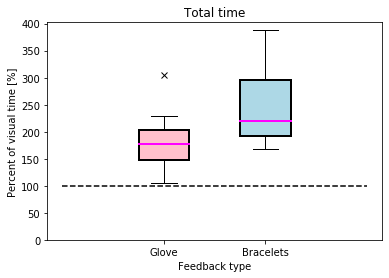

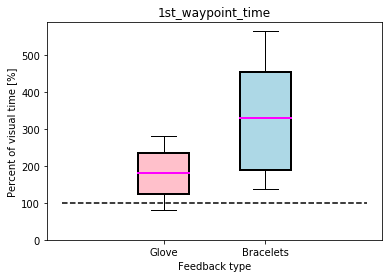

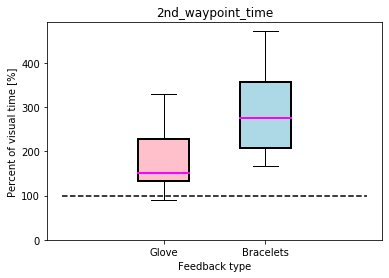

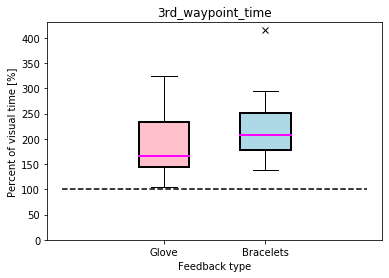

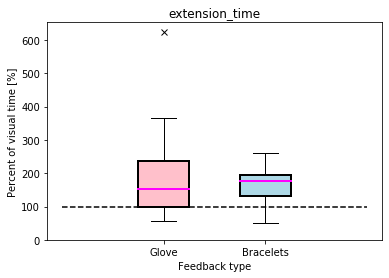

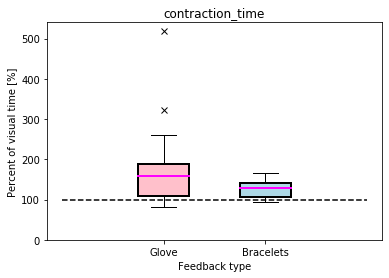

In [161]:
plot_all_times_referred_to_visual()

In [75]:
%debug

> <ipython-input-73-837b64dceaef>(17)get_times_referred_to_visual()
     14     times_list = get_time_for_each_feedback(task_type)
     15     final_list = []
     16     for i in range (0, len(times_list[0])):
---> 17         final_list.append([times_list[i][1]/times_list[i][0], times_list[i][2]/times_list[i][0]])
     18     return final_list



ipdb>  times_list


[[166.5556, 168.4557, 136.1537, 155.2549, 168.2057, 118.8527, 124.603, 119.2027, 137.5538, 176.6062, 137.8038, 152.2547, 131.8534, 131.5534, 137.7038, 208.2581, 268.7079, 122.8029], [241.8602, 292.8520000000001, 261.2597, 207.4081, 312.6972, 143.8042, 259.2102, 363.9846, 244.5103, 259.7101, 315.0466, 270.3575, 301.3499, 214.6085, 297.7008, 316.8961, 281.6048, 232.7596], [365.8842, 501.0012, 271.8072, 294.4016, 281.6048, 316.4463, 272.657, 462.7105, 275.9561, 317.8959, 249.5606, 547.09, 403.9249, 406.2743, 402.9251, 531.2938, 495.5025, 262.7094]]


ipdb>  times_list[0]


[166.5556, 168.4557, 136.1537, 155.2549, 168.2057, 118.8527, 124.603, 119.2027, 137.5538, 176.6062, 137.8038, 152.2547, 131.8534, 131.5534, 137.7038, 208.2581, 268.7079, 122.8029]


ipdb>  len(times_list[0])


18


ipdb>  times_list[0][1]


168.4557


ipdb>  times_list[0][2]


136.1537


ipdb>  times_list[1][1]


292.8520000000001


ipdb>  i


3


ipdb>  times_list[3][1]


*** IndexError: list index out of range


ipdb>  q


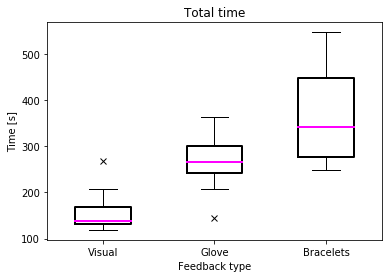

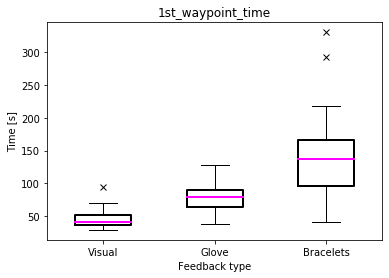

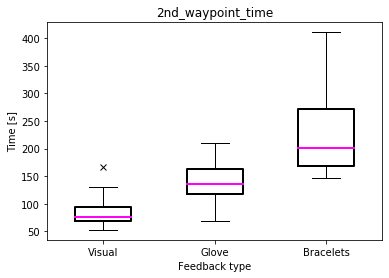

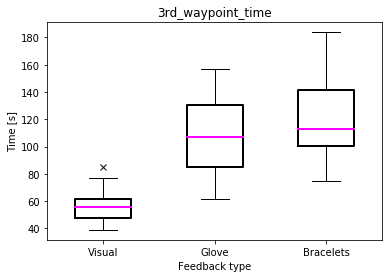

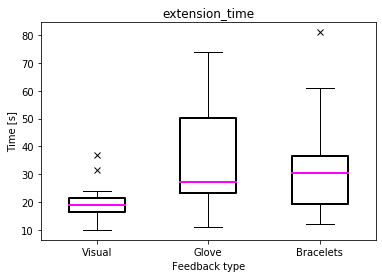

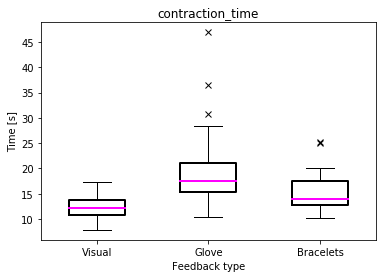

In [63]:
plot_all_boxplot_execution_time()

In [61]:
def plot_all_sub_trajectories(information_type):
    
    
    if information_type == "extension":
        max_error = max_contraction_error
    elif information_type == "position_y":
        max_error = max_height_error
    else: max_error = max_distance_error
        
    fig, ax = plt.subplots(nrows=18, ncols=3, figsize=(16,60))
    row = 0
    column = 0
    for feedback_type in feedback_types:
        files = glob.glob(feedback_types[column]+"\\sorted\\*.csv")
        row = 0
        for file in files:
            data = pd.read_csv(file)
            ax[row][column].plot(data[information_type])
            if information_type == "position_y" : 
                ax[row][column].plot(data["target_"+information_type]+1)
                ax[row][column].plot(data["target_"+information_type]+1+np.ones(len(data["height_error"]))*0.1*max_error)
                ax[row][column].plot(data["target_"+information_type]+1-np.ones(len(data["height_error"]))*0.1*max_error)
            else:
                ax[row][column].plot(data["target_"+information_type])
                ax[row][column].plot(data["target_"+information_type]+np.ones(len(data["height_error"]))*0.1*max_error)
                ax[row][column].plot(data["target_"+information_type]-np.ones(len(data["height_error"]))*0.1*max_error)
            ax[row][column].set_title(feedback_type + " "+ information_type)
            row += 1
        column+=1

Visual\sorted\10_Visual.csv
Visual\sorted\11_Visual.csv
Visual\sorted\12_Visual.csv
Visual\sorted\13_Visual.csv
Visual\sorted\14_Visual.csv
Visual\sorted\15_Visual.csv
Visual\sorted\16_Visual.csv
Visual\sorted\17_Visual.csv
Visual\sorted\18_Visual.csv
Visual\sorted\1_Visual.csv
Visual\sorted\2_Visual.csv
Visual\sorted\3_Visual.csv
Visual\sorted\4_Visual.csv
Visual\sorted\5_Visual.csv
Visual\sorted\6_Visual.csv
Visual\sorted\7_Visual.csv
Visual\sorted\8_Visual.csv
Visual\sorted\9_Visual.csv
Glove\sorted\10_Glove.csv
Glove\sorted\11_Glove.csv
Glove\sorted\12_Glove.csv
Glove\sorted\13_Glove.csv
Glove\sorted\14_Glove.csv
Glove\sorted\15_Glove.csv
Glove\sorted\16_Glove.csv
Glove\sorted\17_Glove.csv
Glove\sorted\18_Glove.csv
Glove\sorted\1_Glove.csv
Glove\sorted\2_Glove.csv
Glove\sorted\3_Glove.csv
Glove\sorted\4_Glove.csv
Glove\sorted\5_Glove.csv
Glove\sorted\6_Glove.csv
Glove\sorted\7_Glove.csv
Glove\sorted\8_Glove.csv
Glove\sorted\9_Glove.csv
Bracelets\sorted\10_Bracelets.csv
Bracelets\so

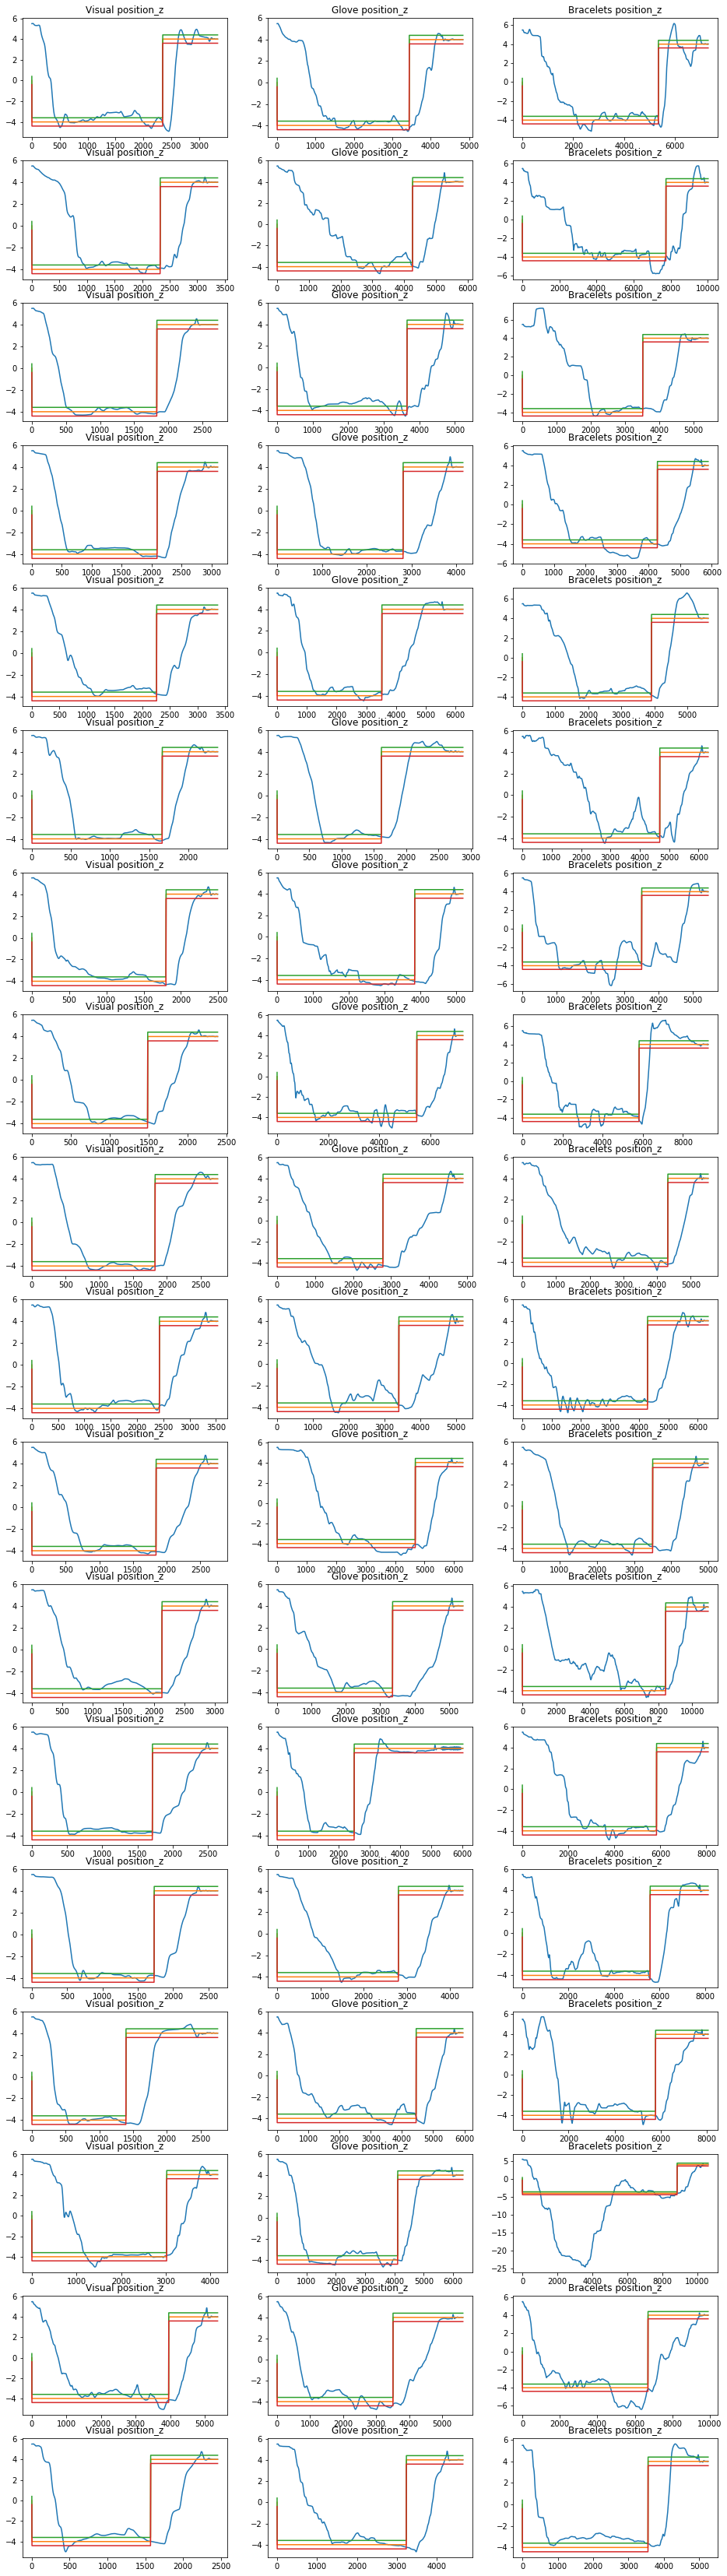

In [62]:
plot_all_sub_trajectories("position_z")

# Total distance

In [96]:
def total_distance(feedback_type):
    files = glob.glob(feedback_type+"\*.csv")
    total_distances = []
    for file in files:
        data = pd.read_csv(file)
        position_x = data["position_x"]
        position_y = data["position_y"]
        position_z = data["position_z"]
        total_distance = 0
        length = len(position_x)
        for i in range(1,length):
            delta_x = position_x[i] - position_x[i-1]
            delta_y = position_y[i] - position_y[i-1]
            delta_z = position_z[i] - position_z[i-1]
            total_distance += math.sqrt(delta_x*delta_x + delta_y*delta_y + delta_z*delta_z)
        total_distances.append(total_distance)    
            
    return total_distances

def plot_distance():    
    medianprops = {'color': 'magenta', 'linewidth': 2}
    boxprops = {'color': 'black', 'linestyle': '-', 'linewidth':2}
    whiskerprops = {'color': 'black', 'linestyle': '-'}
    capprops = {'color': 'black', 'linestyle': '-'}
    flierprops = {'color': 'black', 'marker': 'x'}
    title = "Total distance covered"
 
    fig = plt.figure()
    ax = plt.axes()

    width = 0.5
    bp = plt.boxplot([total_distance(feedback_type) for feedback_type in feedback_types], 
                     widths = width, labels = feedback_types,medianprops=medianprops,
                       patch_artist=True,  # fill with color
                       boxprops=boxprops,
                       whiskerprops=whiskerprops,
                       capprops=capprops,
                       flierprops=flierprops )
    
    colors = ['pink', 'lightblue', 'lightgreen']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    plt.title(title)
    ax.set_xlabel('Feedback type')
    ax.set_ylabel('Distance covered [m]')
        

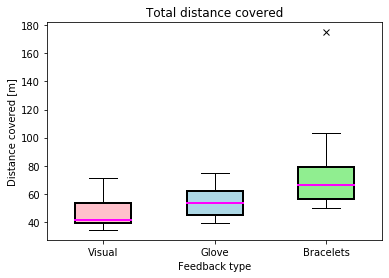

In [97]:
plot_distance()

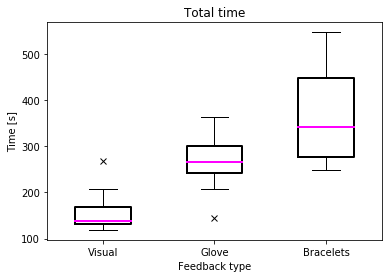

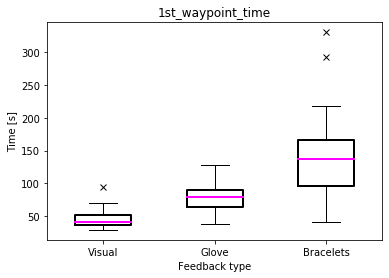

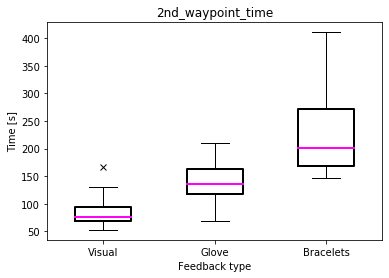

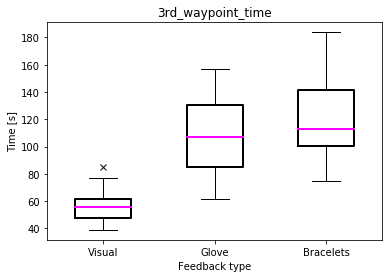

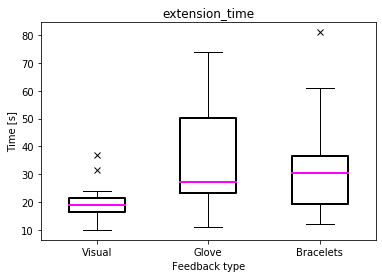

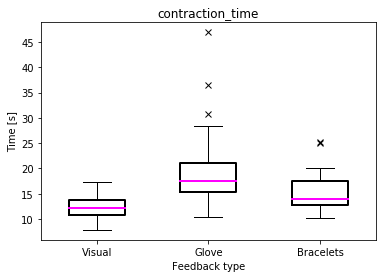

In [18]:
plot_all_boxplot_execution_time()

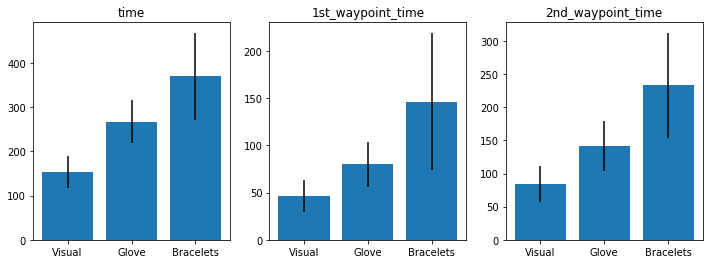

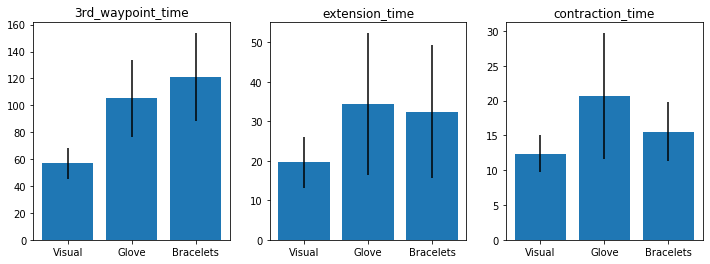

In [19]:
plot_all_execution_times()

In [20]:
def get_overshoot_count_by_type(feedback_type, error_type):
    #feedback_type : string, "Visual", "Glove", "Bracelets"
    #error_type : string, height_error, x_error, z_error, extension_error
    error_list = []
    max_error = 0
    
    overshoot_list = []
    
    files = glob.glob(feedback_type+"\*.csv")
    for file in files:
        data = pd.read_csv(file)
        if error_type == "height_error":
            error_list = data["height_error"]
            max_error = max_height_error
        elif error_type == "x_error":
            error_list = data["target_position_x"]-data["position_x"]
            max_error = max_distance_error
        elif error_type == "z_error":
            error_list = data["target_position_y"]-data["position_y"]
            max_error = max_distance_error
        elif error_type == "extension_error":
            error_list = data["extension_error"]
            max_error = max_contraction_error
        else : 
            print("incorrect error_type")
            return
        overshoot_list.append(get_overshoot_count(error_list, max_error))
        
    return overshoot_list

def get_overshoot_count(error_list, max_error):
    wasOk = False
    overshoot_count = 0
    for point in error_list:
        if point > 0.1*max_error:
            if wasOk:
                overshoot_count += 1
                wasOk = False
        elif point < -0.1*max_error:
            if wasOk:
                overshoot_count += 1
                wasOk = False
        else: wasOk = True
    return overshoot_count-1 # - 1 because at the begining, it is not an overshoot

def get_overshoot_count_mean_and_std(feedback_type, error_type):
    #feedback_type : string, "Visual", "Glove", "Bracelets"
    #error_type : string, height_error, x_error, z_error, extension_error
    error_list = []
    max_error = 0
    
    overshoot_list = []
    
    files = glob.glob(feedback_type+"\*.csv")
    for file in files:
        data = pd.read_csv(file)
        if error_type == "height_error":
            error_list = data["height_error"]
            max_error = max_height_error
        elif error_type == "x_error":
            error_list = data["target_position_x"]-data["position_x"]
            max_error = max_distance_error
        elif error_type == "z_error":
            error_list = data["target_position_y"]-data["position_y"]
            max_error = max_distance_error
        elif error_type == "extension_error":
            error_list = data["extension_error"]
            max_error = max_contraction_error
        else : 
            print("incorrect error_type")
            return
        overshoot_list.append(get_overshoot_count(error_list, max_error))
        
    return [np.mean(np.asarray(overshoot_list)), np.std(np.asarray(overshoot_list))]

def plot_overshoot( error_type):    
    mean_and_std_list =[ get_overshoot_count_mean_and_std(feedback_type, error_type) for feedback_type in feedback_types]
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1,3,1)
    ax.bar([0, 1,2],
       [mean_and_std_list[0][0], mean_and_std_list[1][0], mean_and_std_list[2][0]],
          yerr =[mean_and_std_list[0][1], mean_and_std_list[1][1], mean_and_std_list[2][1]])

    plt.xticks(range(3),feedback_types)
    plt.ylim([0, 20])
    plt.title('Nb of overshoot for '+ error_type)
    

def plot_all_overshoot():
    i = 1
    for error_type in error_types:
        mean_and_std_list =[get_overshoot_count_mean_and_std(feedback_type, error_type) for feedback_type in feedback_types]
        if i == 1:    fig = plt.figure(figsize=(12, 4))

        ax = fig.add_subplot(1, 3, i)
        ax.bar([0, 1,2],
           [mean_and_std_list[0][0], mean_and_std_list[1][0], mean_and_std_list[2][0]],
              yerr =[mean_and_std_list[0][1], mean_and_std_list[1][1], mean_and_std_list[2][1]])

        plt.xticks(range(3),feedback_types)
        plt.ylim([0, 20])
        plt.title('Nb of overshoot for '+ error_type)    
        i+=1
        if i > 3 : i = 1

def plot_overshoot_boxplot(error_type):
    medianprops = {'color': 'magenta', 'linewidth': 2}
    boxprops = {'color': 'black', 'linestyle': '-', 'linewidth':2}
    whiskerprops = {'color': 'black', 'linestyle': '-'}
    capprops = {'color': 'black', 'linestyle': '-'}
    flierprops = {'color': 'black', 'marker': 'x'}
    title = error_type
 
    fig = plt.figure()
    ax = plt.axes()

    width = 0.5
    bp = plt.boxplot([get_overshoot_count_by_type(feedback_types[0], error_type), get_overshoot_count_by_type(feedback_types[1], error_type), get_overshoot_count_by_type(feedback_types[2], error_type)], 
                     widths = width, labels = feedback_types,medianprops=medianprops,
                       patch_artist=True,  # fill with color
                       boxprops=boxprops,
                       whiskerprops=whiskerprops,
                       capprops=capprops,
                       flierprops=flierprops )
    
    colors = ['pink', 'lightblue', 'lightgreen']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    plt.title(title)
    ax.set_xlabel('Feedback type')
    ax.set_ylabel('Number of overshoot')
    
def plot_all_overshoot_boxplot():
    for error_type in error_types :
        plot_overshoot_boxplot(error_type)


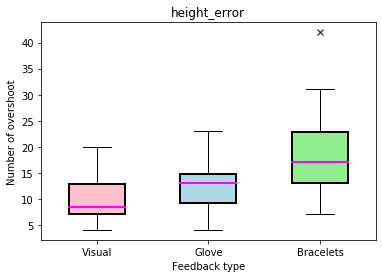

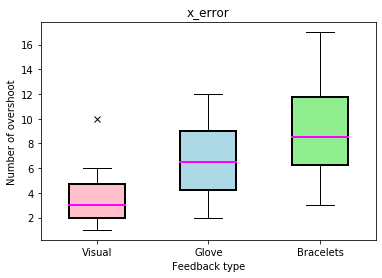

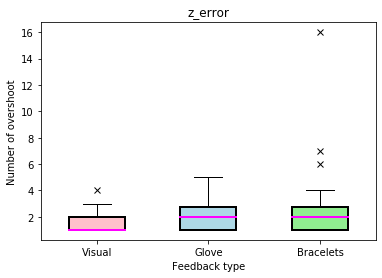

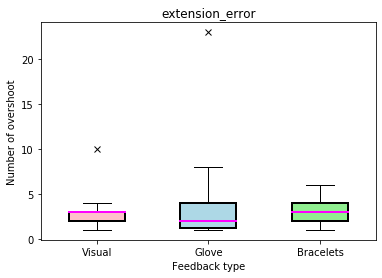

In [21]:
plot_all_overshoot_boxplot()

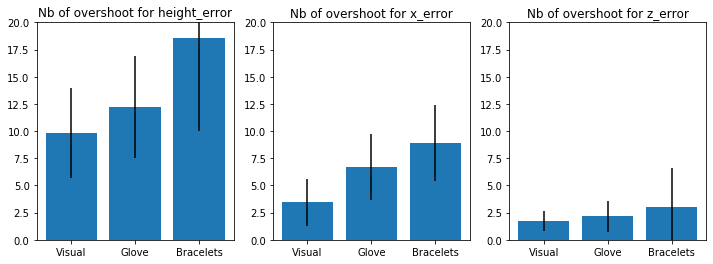

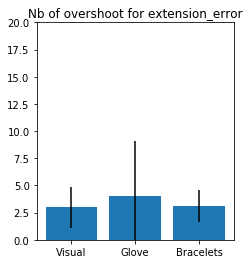

In [22]:
plot_all_overshoot()


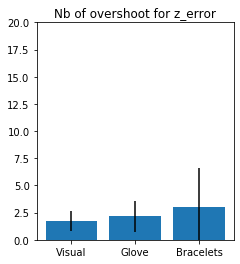

In [23]:
plot_overshoot("z_error")

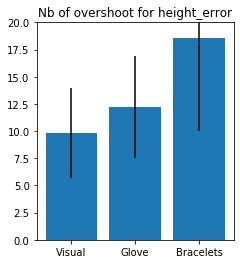

In [24]:
plot_overshoot("height_error")

In [25]:
files = glob.glob("Visual"+"\*.csv")

In [28]:
files[0]

'Visual\\10_35_55_sub13_Visual.csv'

In [29]:
import re

In [41]:
s = 'ab_subcd'
re.sub(".*$sub", "", s)

'ab_subcd'

In [46]:
name = "10_35_55_sub13_Visual"
splitting = name.split('sub')
print(splitting[1])


13_Visual
